# Question 1


The goal of this project is to develop a machine learning model that can accurately classify handwritten digits in a given dataset. The dataset consists of images of handwritten digits ranging from 0 to 9.

The boiler plate has been given below.


Sample Input:

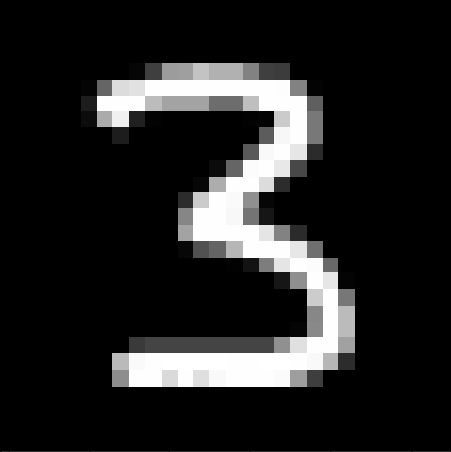

Output:

3


In [11]:
pip install keras

In [5]:
pip install tensorflow

In [8]:
# importing the dataset

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [13]:
import tensorflow as tf
from tensorflow.keras import layers , models
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0 , test_images / 255.0 #Normalize pixel values to 0,1
#Reshape the image
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [16]:
#build cnn model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation ='relu', input_shape = (28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [18]:
#write your code here

#compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)
#Evaluate the model
test_loss,test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy :",test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1423 - accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0502 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0052 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

In [23]:
from tensorflow.keras.preprocessing import image


In [21]:
# After training the model, run this to test the model
# Replace model and image with your model and image

from keras.preprocessing import image
import numpy as np

img_path = 'image_name.png' #enter your image name here
img = image.load_img(img_path, target_size=(28, 28), grayscale=True)

img_array = image.img_to_array(img)

img_array = img_array.reshape((1, 28, 28, 1))
img_array = img_array.astype('float32') / 255.0

predictions = model.predict(img_array) # here model indicates is your trained model

predicted_label = np.argmax(predictions)

print("Predicted digit:", predicted_label)

AttributeError: ignored